This notebook is designed to showcase the power of [lvlspy](https://pypi.org/project/lvlspy/) as an API by using it replicate the results from [Gupta and Meyer](https://journals.aps.org/prc/abstract/10.1103/PhysRevC.64.025805). The paper focuses on calculating the equilibration rate between the isomeric state and the ground state of $^{26}\mathrm{Al}$. The methods built into [lvlspy](https://pypi.org/project/lvlspy/) are based on that publication.

To kick things off, we will quietly install any missing packages required for lvlspy and import all the packages required for this notebook. Most are built-in or installed with lvlspy.

In [1]:
#importing system libraries
import sys,subprocess,importlib.util, io, requests

#checking and installing required packages
required  = {'lvlspy'}
installed = {pkg for pkg in required if importlib.util.find_spec(pkg) is not None}
missing = required - installed

if missing:
    subprocess.check_call([sys.executable,'-m','pip','install','--quiet',*missing])

#import libraries and modules
import numpy as np
import lvlspy.spcoll as lc
import matplotlib.pyplot as plt

from lvlspy.io import xml
from lvlspy.calculate import isomer

Now that all the packages are installed, let us first download an XML file, found on [OSF](https://osf.io/dqzs9), and load into lvlspy

In [2]:
new_coll = lc.SpColl()
xml.update_from_xml(new_coll,io.BytesIO(requests.get('https://osf.io/dqzs9/download').content))
#get the species into separate variable
al26 = new_coll.get()['al26']

Now that the species is loaded from the xml, let's calculate the isomerization rates then graph it

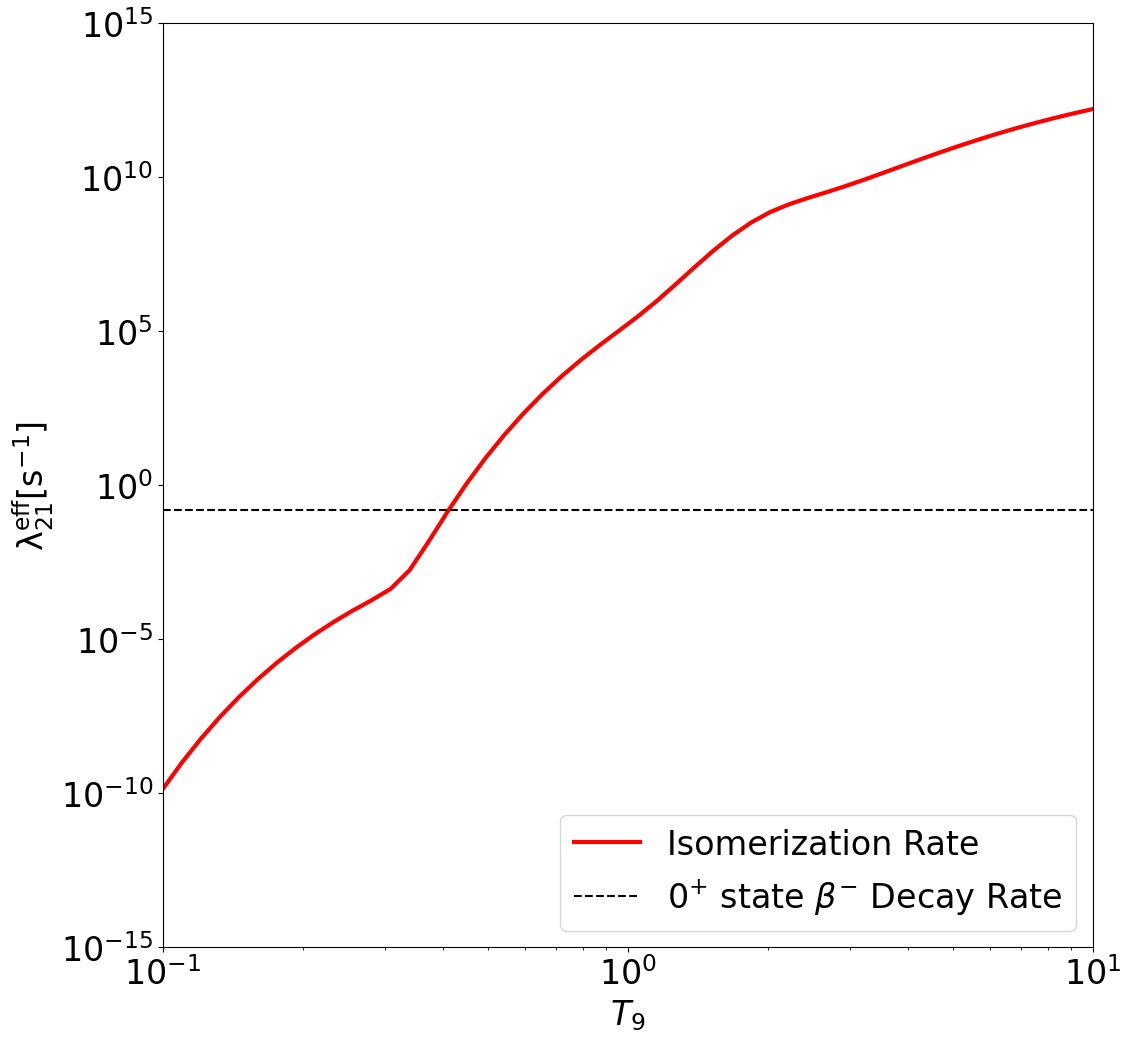

In [3]:
T = np.logspace(8,10) #setting the temperature array

#initializing the rate arrays
l_21 = np.empty(len(T))
l_12 = np.empty(len(T))

for i,t in enumerate(T):
    l_12[i], l_21[i] = isomer.effective_rate(t,al26)

#Set the fontsize and graph
fontsize = 24

plt.figure(figsize = (12,12))
plt.rcParams['font.size'] = fontsize
plt.xscale('log')
plt.yscale('log')

plt.ylim([1.e-15,1.e+15])
plt.xlim([np.min(T)/1e+9,np.max(T)/1e+9])

plt.plot(T/1e+9,l_21,color = 'red',linewidth = 3,label = 'Isomerization Rate')

plt.ylabel(r'$\mathrm{\lambda_{21}^{eff} [s^{-1}]}$')
plt.xlabel(r'$T_{9}$')

plt.yticks([1e-15,1e-10,1e-5,1e0,1e+5,1e+10,1e+15])

plt.axhline(y = 0.158,ls = '--',color = 'black',label = r'$0^{+}$ state $\beta^{-}$ Decay Rate')#beta decay rate

plt.legend(loc = 'lower right')
plt.show()

As we can see, the figure is a carbon copy of figure 1 from the [paper](https://journals.aps.org/prc/pdf/10.1103/PhysRevC.64.025805) without the removed level, which will be tackled later.